#Importing libraries

In [192]:
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn import metrics
from scipy import stats


#Loading Iris DataSet

In [193]:
ds_iris=load_iris()
type(ds_iris)

sklearn.utils.Bunch

In [194]:
import seaborn as sns
sns.set(style="white",color_codes=True)
%matplotlib inline

In [195]:
print(ds_iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [196]:
ds_iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [197]:
df_iris= pd.DataFrame(ds_iris.data,columns=ds_iris.feature_names)
df_iris['species'] = ds_iris.target
df_iris.sample

<bound method NDFrame.sample of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]>

#Data Visualisation

In [198]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [199]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [200]:
df_iris.corr(method='pearson')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


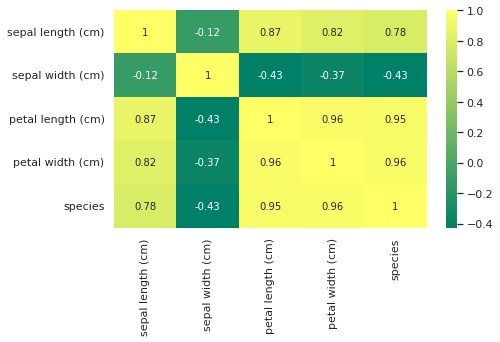

In [201]:
plt.figure(figsize=(7,4))
sns.heatmap(df_iris.corr(),annot=True,cmap='summer')

In [202]:
df_iris.shape

(150, 5)

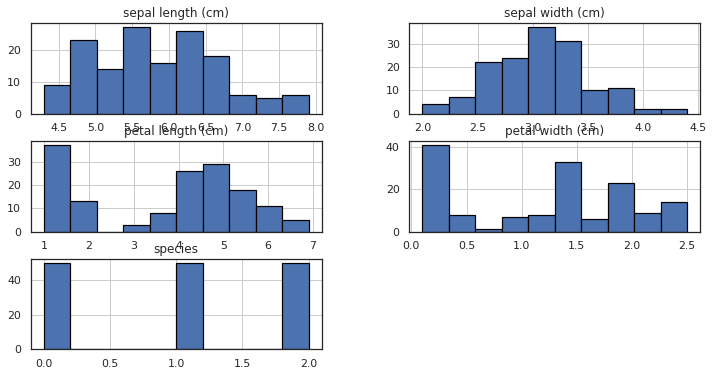

In [203]:
df_iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [204]:
x=df_iris.iloc[:,0:5]
y=df_iris['species']

In [205]:
x.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [206]:
y.head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: species, dtype: int64

In [207]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


#Train &Test Split

In [208]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=0)

In [209]:
train_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
60,5.0,2.0,3.5,1.0,1
116,6.5,3.0,5.5,1.8,2
144,6.7,3.3,5.7,2.5,2
119,6.0,2.2,5.0,1.5,2
108,6.7,2.5,5.8,1.8,2
...,...,...,...,...,...
9,4.9,3.1,1.5,0.1,0
103,6.3,2.9,5.6,1.8,2
67,5.8,2.7,4.1,1.0,1
117,7.7,3.8,6.7,2.2,2


In [210]:
train_y

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: species, Length: 105, dtype: int64

In [211]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaler.fit(x)
x_scaledarray=scaler.transform(x)
scaled_x=pd.DataFrame(x_scaledarray,columns=x.columns)


In [212]:
scaled_x.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
24,-1.264185,0.788808,-1.056039,-1.315444,-1.224745


#GMM Clustering

In [213]:
gmm_cluster=GaussianMixture(n_components=4)
gmm_cluster.fit(scaled_x)
gmm_y=gmm_cluster.predict(scaled_x)


In [214]:
print(gmm_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


In [215]:

stats.mode(gmm_y)


ModeResult(mode=array([0]), count=array([50]))

#Reporting Value of numpy.sum((y_pred==y) / len(y_pred))

In [216]:
df_data = pd.DataFrame(data=ds_iris.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df_tag = pd.DataFrame(data=ds_iris.target, columns=["class"])

df_tag = np.array(df_tag).reshape(150,)
np.sum(gmm_y==df_tag) / len(gmm_y)

0.38

#Generating Blobs

In [217]:
blob_x=df_iris.iloc[:,0:5]
blob_y=df_iris['species']

In [218]:
blob_centers=np.array(
    [[0.2,2.3],
     [-1.5,2.3],
     [-2.8,1.8],
     [-2.8,2.8],
     [-2.8,1.3]])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


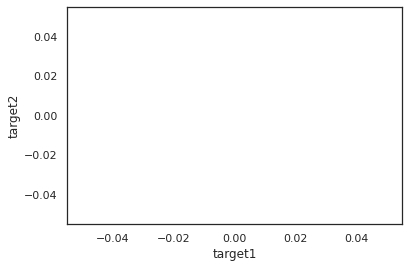

In [219]:
%matplotlib inline

from pandas import DataFrame

points = DataFrame(blob_x, columns=["target1", "target2"])
points.plot.scatter("target1", "target2")

In [220]:
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [221]:
blob_x,blob_y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

In [222]:
print(blob_x.shape)

(2000, 2)


#K-Means Clustering

In [223]:
cluster_num=3


In [224]:
km3 = KMeans(n_clusters = cluster_num ,max_iter=1000, random_state = 2)

In [225]:
km3.fit(ds_iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [226]:
cluster_y=km3.predict(ds_iris.data)

In [227]:
cluster_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [228]:
km3.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [229]:
km3.inertia_

78.85144142614601

In [230]:
accuracy=metrics.silhouette_score(scaled_x,cluster_y)
print(accuracy)

0.4656162216797342


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


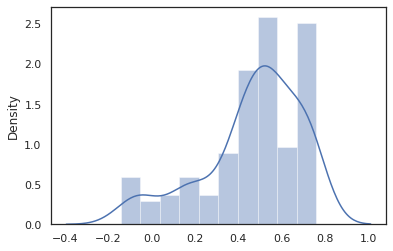

In [231]:
accuracy= metrics.silhouette_samples(scaled_x,cluster_y)
sns.distplot(accuracy)

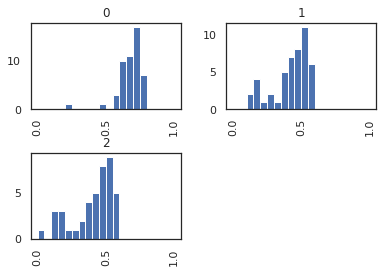

In [232]:
df_accuracy = pd.DataFrame()
df_accuracy['SilhouetteScore'] = accuracy
df_accuracy['species'] = df_iris['species']
df_accuracy.hist(by = 'species', column = 'SilhouetteScore' , range = (0,1.0), bins = 20);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


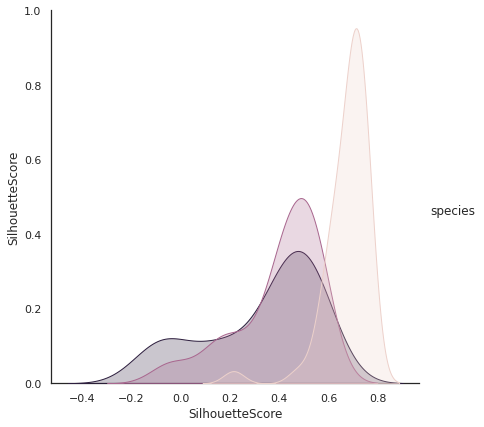

In [233]:
sns.pairplot(df_accuracy,hue="species",size =6)

#K-Meansclustering with 8 Clusters

In [234]:
cluster_num=8

In [235]:
km8 = KMeans(n_clusters = cluster_num ,max_iter=1000, random_state = 2)

In [236]:
km8.fit(ds_iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [237]:
cluster_y1=km8.predict(ds_iris.data)

In [238]:
km8.cluster_centers_

array([[6.02777778, 2.73333333, 5.02777778, 1.79444444],
       [4.81818182, 3.23636364, 1.43333333, 0.23030303],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [5.        , 2.3       , 3.275     , 1.025     ],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.37058824, 3.8       , 1.51764706, 0.27647059],
       [6.43      , 2.94      , 4.59      , 1.435     ]])

In [239]:
km8.inertia_

30.378860962566847

In [240]:
accuracy1=metrics.silhouette_score(scaled_x,cluster_y1)
print(accuracy1)

0.30914486085914555


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


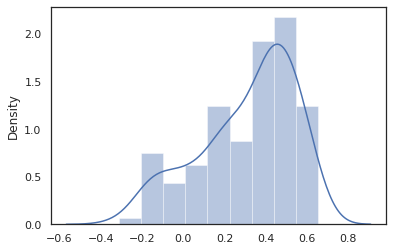

In [241]:
accuracy1= metrics.silhouette_samples(scaled_x,cluster_y1)
sns.distplot(accuracy1)

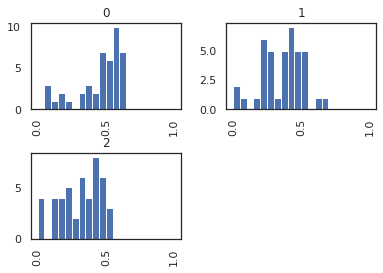

In [242]:
df_accuracy1 = pd.DataFrame()
df_accuracy1['SilhouetteScore'] = accuracy1
df_accuracy1['species'] = df_iris['species']
df_accuracy1.hist(by = 'species', column = 'SilhouetteScore' , range = (0,1.0), bins = 20);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


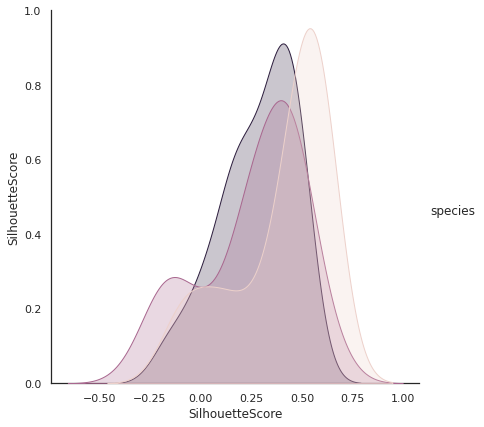

In [243]:
sns.pairplot(df_accuracy1,hue="species",size =6)

#Elbow Method

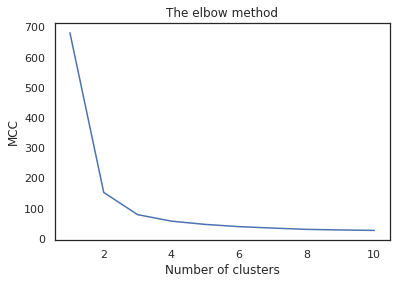

In [244]:
mcc = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(ds_iris.data)
    mcc.append(kmeans.inertia_)
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), mcc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('MCC') #within cluster sum of squares
plt.show()

#KMM-Blob

In [245]:
kmm_blob1 = KMeans(n_clusters=8, max_iter =1000)

In [246]:
kmm_blob1.fit(blob_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [247]:
kmm_centers1= kmm_blob1.cluster_centers_

#Voronoi Plot

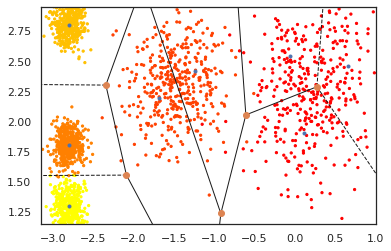

In [248]:
Voro = Voronoi(kmm_centers1) 
voronoi_plot_2d(Voro) 
plt.scatter(blob_x[:, 0], blob_x[:, 1], c=blob_y, s=5, cmap='autumn')

#Predicting K-Means for X_new

In [249]:
X_new= np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

In [250]:
km3.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [251]:
Y_new=km3.predict(X_new)

ValueError: ignored